# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [8]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install --upgrade --force-reinstall numpy

  Using cached numpy-2.4.2-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
Using cached numpy-2.4.2-cp312-cp312-win_amd64.whl (12.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.


In [14]:
%pip install --upgrade --force-reinstall numpy

import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


  Using cached numpy-2.4.2-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
Using cached numpy-2.4.2-cp312-cp312-win_amd64.whl (12.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.


In [20]:
# Define the path to your data folder (update if needed)
DATA_PATH = './asl_data'  # or the correct path to your data

train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [21]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [22]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [24]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Split the dataset into validation and test sets.
    
    Parameters:
    x: numpy array of features
    y: numpy array of labels
    pct: percentage of data to use for validation (default 0.5)
    shuffle: whether to shuffle the data before splitting (default True)
    
    Returns:
    x_val, y_val, x_test, y_test: split datasets
    '''
    
    # Get the number of samples
    num_samples = len(x)
    
    # Create indices array
    indices = np.arange(num_samples)
    
    # Shuffle if requested
    if shuffle:
        np.random.seed(42)  # For reproducibility
        np.random.shuffle(indices)
    
    # Calculate split point
    split_point = int(num_samples * pct)
    
    # Split indices
    val_indices = indices[:split_point]
    test_indices = indices[split_point:]
    
    # Split the data
    x_val_split = x[val_indices]
    y_val_split = y[val_indices]
    
    x_test = x[test_indices]
    y_test = y[test_indices]
    
    return x_val_split, y_val_split, x_test, y_test

In [25]:
# Split the validation set into new validation and test sets
x_val_new, y_val_new, x_test, y_test = split_val_test(x_val, y_val, pct=0.5, shuffle=True)

# Print the sizes of the new datasets
print(f"Original validation size: {len(x_val)}")
print(f"New validation size: {len(x_val_new)}")
print(f"Test size: {len(x_test)}")
print(f"Label distribution in new validation: {np.bincount(y_val_new)}")
print(f"Label distribution in test: {np.bincount(y_test)}")

Original validation size: 7172
New validation size: 3586
Test size: 3586
Label distribution in new validation: [164 221 152 129 252 130 160 213 147 162 105 200 141 121 175  75  71 118
 129 136 183 103 136 163]
Label distribution in test: [167 211 158 116 246 117 188 223 141 169 104 194 150 125 172  89  73 128
 119 130 163 103 131 169]


In [26]:
### The following

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

In [27]:
def normalise(x, method='minmax', range=(0, 1)):
    '''
    Normalize data using different methods.
    
    Parameters:
    x: numpy array of data
    method: normalization method ('minmax', 'meanstd', or 'scale255')
            - 'minmax': scale to specified range (default 0-1)
            - 'meanstd': zero mean, unit variance
            - 'scale255': simple divide by 255 (for 0-255 pixel values)
    range: tuple for min and max range when using 'minmax' method
    
    Returns:
    Normalized array
    '''
    
    if method == 'scale255':
        # Simple normalization for pixel values (0-255)
        return x / 255.0
    
    elif method == 'minmax':
        # Min-max normalization to specified range
        x_min = x.min()
        x_max = x.max()
        
        # Avoid division by zero
        if x_max - x_min == 0:
            return np.zeros_like(x)
        
        x_norm = (x - x_min) / (x_max - x_min)
        
        # Scale to desired range
        range_min, range_max = range
        return x_norm * (range_max - range_min) + range_min
    
    elif method == 'meanstd':
        # Standardization (zero mean, unit variance)
        mean = x.mean()
        std = x.std()
        
        # Avoid division by zero
        if std == 0:
            return np.zeros_like(x)
        
        return (x - mean) / std
    
    else:
        raise ValueError(f"Unknown normalization method: {method}")

In [29]:
# Option 1: Simple normalization (0-255 pixel values)
#x_train_norm = normalise(x_train, method='scale255')

# Option 2: Min-max normalization (values between 0 and 1)
#x_train_norm = normalise(x_train, method='minmax', range=(0, 1))

# Option 3: Normalization between -1 and 1 (useful for some neural networks)
#x_train_norm = normalise(x_train, method='minmax', range=(-1, 1))

# Option 4: Standardization (mean=0, std=1)
#x_train_norm = normalise(x_train, method='meanstd')

x_train = normalise(x_train, method='scale255')

### Graficar muestras

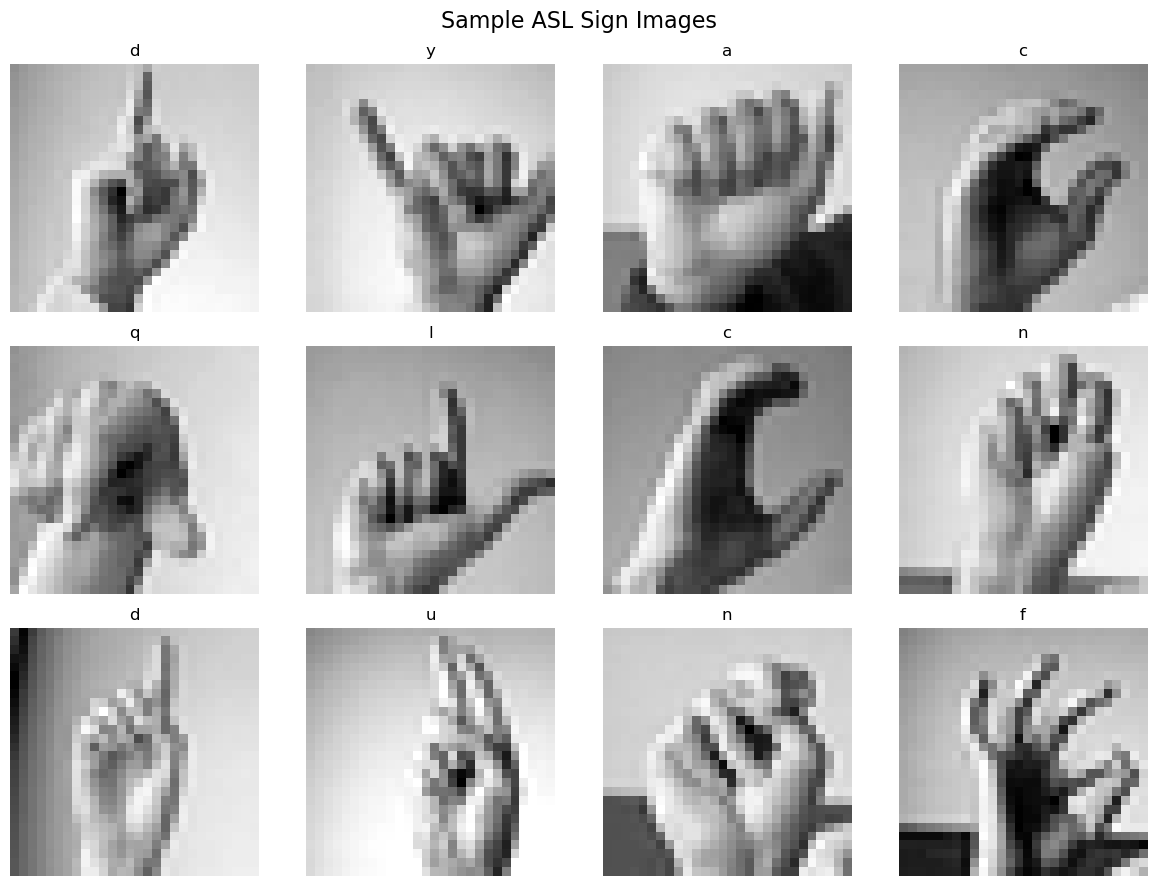

In [30]:
def plot_number(img, label=None):
    '''
    Plot a 28x28 image (handwritten sign).
    
    Parameters:
    img: 28x28 numpy array representing the image
    label: optional label to display in title
    '''
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    if label is not None:
        plt.title(f'Label: {label}')
    plt.tight_layout()
    plt.show()

# Display some sample images from the training set
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Sample ASL Sign Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(len(x_train))
    img = x_train[idx].reshape(28, 28)
    label = alphabet[y_train[idx]]
    ax.imshow(img, cmap='gray')
    ax.set_title(f'{label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [ ]:
def create_mini_batches(x, y, batch_size=32, shuffle=True):
    '''
    Create mini batches from the dataset.
    
    Parameters:
    x: numpy array of features
    y: numpy array of labels
    batch_size: size of each mini batch (default 32)
    shuffle: whether to shuffle the data before creating batches (default True)
    
    Returns:
    List of tuples (x_batch, y_batch)
    '''
    
    num_samples = len(x)
    indices = np.arange(num_samples)
    
    # Shuffle if requested
    if shuffle:
        np.random.shuffle(indices)
    
    # Create mini batches
    mini_batches = []
    for i in range(0, num_samples, batch_size):
        batch_indices = indices[i:i + batch_size]
        x_batch = x[batch_indices]
        y_batch = y[batch_indices]
        mini_batches.append((x_batch, y_batch))
    
    return mini_batches

## Nuestra clase Linear, ReLU y Sequential

###  Clase Linear

In [ ]:
class Linear:
    '''
    Linear (fully connected) layer implementation.
    
    Parameters:
    input_size: number of input features
    output_size: number of output features (neurons)
    '''
    
    def __init__(self, input_size, output_size):
        '''
        Initialize the linear layer with weights and biases.
        
        Weights are initialized with small random values (Xavier/He initialization).
        Biases are initialized to zeros.
        '''
        # Xavier initialization for weights
        limit = np.sqrt(6 / (input_size + output_size))
        self.W = np.random.uniform(-limit, limit, size=(input_size, output_size)).astype(np.float32)
        self.b = np.zeros((1, output_size)).astype(np.float32)
        
        # Store gradients for backpropagation
        self.dW = None
        self.db = None
        
        # Store input for backpropagation
        self.X = None
    
    def forward(self, X):
        '''
        Forward pass: compute Z = X @ W + b
        
        Parameters:
        X: input data of shape (batch_size, input_size)
        
        Returns:
        Z: output of shape (batch_size, output_size)
        '''
        self.X = X
        Z = X @ self.W + self.b
        return Z
    
    def backward(self, dZ):
        '''
        Backward pass: compute gradients with respect to W, b, and X
        
        Parameters:
        dZ: gradient of loss with respect to Z, shape (batch_size, output_size)
        
        Returns:
        dX: gradient of loss with respect to X, shape (batch_size, input_size)
        '''
        batch_size = self.X.shape[0]
        
        # Gradients with respect to weights and biases
        self.dW = (self.X.T @ dZ) / batch_size
        self.db = np.sum(dZ, axis=0, keepdims=True) / batch_size
        
        # Gradient with respect to input
        dX = dZ @ self.W.T
        
        return dX
    
    def update_parameters(self, learning_rate):
        '''
        Update weights and biases using gradient descent.
        
        Parameters:
        learning_rate: learning rate for the update
        '''
        self.W -= learning_rate * self.dW
        self.b -= learning_rate * self.db

### Clase ReLU

In [ ]:
class ReLU:
    '''
    ReLU (Rectified Linear Unit) activation function implementation.
    '''
    
    def __init__(self):
        '''
        Initialize the ReLU layer.
        Store input for backpropagation.
        '''
        self.Z = None
    
    def forward(self, Z):
        '''
        Forward pass: compute ReLU activation
        ReLU(Z) = max(0, Z)
        
        Parameters:
        Z: input data of shape (batch_size, num_features)
        
        Returns:
        A: activated output of shape (batch_size, num_features)
        '''
        self.Z = Z
        A = np.maximum(0, Z)
        return A
    
    def backward(self, dA):
        '''
        Backward pass: compute gradient with respect to Z
        
        Parameters:
        dA: gradient of loss with respect to A, shape (batch_size, num_features)
        
        Returns:
        dZ: gradient of loss with respect to Z, shape (batch_size, num_features)
        '''
        # Gradient is 1 where Z > 0, and 0 where Z <= 0
        dZ = dA * (self.Z > 0).astype(np.float32)
        return dZ

### Clase Sequential

### Cost Function

### Loop de entrenamiento

### Create your model and train it

### Test your model on Random data from your test set

In [ ]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')